**Análise e exploração dos Dados**

Durante essa fase a análise e exploração dos dados deve ser realizada, por meio das etapas de:

*   Preparar os dados
*   Analisar os atributos
*   Analisar as relações entre os atributos de forma bivariada e multivariada
*   Identificar possíveis casos atípicos
*   Avaliar a presença de dados ausentes
*   Avaliar suposições básicas

link da base de dados:

https://dados.gov.br/dados/conjuntos-dados/serie-historica-de-precos-de-combustiveis-e-de-glp


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn import preprocessing

In [2]:
# dados é um DataFrame
df_combustiveis = pd.read_csv("/content/PrecoCombustiveisGLP.csv",
           sep=";")

In [3]:
df_combustiveis.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GASOLINA,11/05/2004,"1,967","1,6623",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,ETANOL,11/05/2004,"0,899","0,6282",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,DIESEL,11/05/2004,"1,299","1,1704",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,GASOLINA,10/05/2004,"1,85","1,67",R$ / litro,BRANCA
4,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,ETANOL,10/05/2004,"0,78","0,48",R$ / litro,BRANCA


In [4]:
df_combustiveis.tail(3)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
281528,NE,BA,LIVRAMENTO DE NOSSA SENHORA,AUTO POSTO PIRES PEREIRA LTDA,02.253.236/0001-65,AVENIDA LINDEMBERG CARDOSO,667,COMODO,TAQUARI,46140-000,DIESEL,28/06/2004,"1,41","1,32",R$ / litro,PETROBAHIA
281529,NE,BA,LIVRAMENTO DE NOSSA SENHORA,AUTO POSTO 5 DE FEVEREIRO LTDA,02.125.226/0001-44,PRACA CORONEL ZEZINHO TANAJURA,1,COMODO,CENTRO,46140-000,ETANOL,28/06/2004,"1,49","0,6909",R$ / litro,PETROBAHIA
281530,NE,BA,LIVRAMENTO DE NOSSA SENHORA,AUTO POSTO 5 DE FEVEREIRO LTDA,02.125.226/0001-44,PRACA CORONEL ZEZINHO TANAJURA,1,COMODO,CENTRO,46140-000,DIESEL,28/06/2004,"1,44","1,255",R$ / litro,PETROBAHIA


In [5]:
df_combustiveis.dtypes

,0
Regiao - Sigla,object
Estado - Sigla,object
Municipio,object
Revenda,object
CNPJ da Revenda,object
Nome da Rua,object
Numero Rua,object
Complemento,object
Bairro,object
Cep,object


In [6]:
# Outra forma de verificar o Dtype e a quantidade de Range, assim como dados das colunas
df_combustiveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281531 entries, 0 to 281530
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Regiao - Sigla     281531 non-null  object
 1   Estado - Sigla     281531 non-null  object
 2   Municipio          281531 non-null  object
 3   Revenda            281531 non-null  object
 4   CNPJ da Revenda    281531 non-null  object
 5   Nome da Rua        281531 non-null  object
 6   Numero Rua         281358 non-null  object
 7   Complemento        92233 non-null   object
 8   Bairro             280713 non-null  object
 9   Cep                281531 non-null  object
 10  Produto            281531 non-null  object
 11  Data da Coleta     281531 non-null  object
 12  Valor de Venda     281531 non-null  object
 13  Valor de Compra    195235 non-null  object
 14  Unidade de Medida  281531 non-null  object
 15  Bandeira           281531 non-null  object
dtypes: object(16)
memory

In [7]:
df_combustiveis.isnull()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281526,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
281527,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
281528,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
281529,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df_combustiveis.isnull().sum()

,0
Regiao - Sigla,0
Estado - Sigla,0
Municipio,0
Revenda,0
CNPJ da Revenda,0
Nome da Rua,0
Numero Rua,173
Complemento,189298
Bairro,818
Cep,0


In [9]:
# porcentagem dos dados faltantes do Valor de Compra em relação ao total dos dados
# não estou calculando de outras colunas faltantes por não ser relevante para a análise
288708/915316

0.3154189372850469

<Axes: >

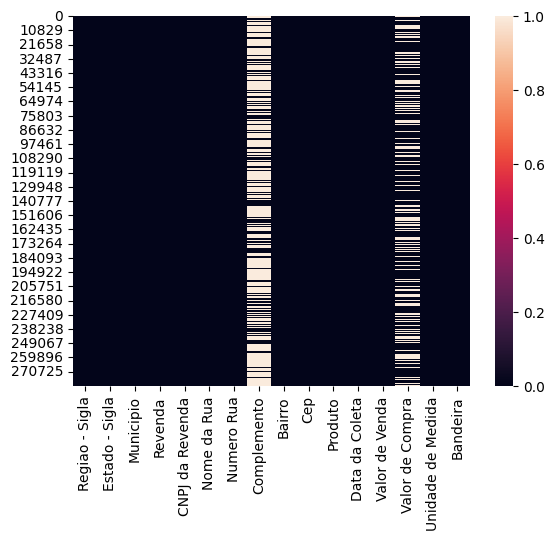

In [10]:
# Para verificar os valores ausentes por coluna de forma visual
sns.heatmap(df_combustiveis.isnull())

In [11]:
# Removendo colunas dados micros em que são repetidos, visto que já se tem os mesmo dados no macro como Região, Estado, Municipio
# Removi também CNPJ da Revenda porque já há o nome Revenda para análise
# axis = 1 porque estou removendo as colunas
df_combustiveis_2 = df_combustiveis.drop(['Nome da Rua','Numero Rua', 'Complemento', 'Bairro', 'Cep', 'CNPJ da Revenda'], axis = 1)

In [12]:
df_combustiveis_2.head(10)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,GASOLINA,11/05/2004,"1,967","1,6623",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,ETANOL,11/05/2004,"0,899","0,6282",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,DIESEL,11/05/2004,"1,299","1,1704",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,GASOLINA,10/05/2004,"1,85","1,67",R$ / litro,BRANCA
4,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,ETANOL,10/05/2004,"0,78","0,48",R$ / litro,BRANCA
5,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,DIESEL,10/05/2004,"1,29","1,216",R$ / litro,BRANCA
6,CO,DF,BRASILIA,GASOL COMBUSTÍVEIS AUTOMOTIVOS LTDA.,GASOLINA,10/05/2004,"2,03","1,7021",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
7,CO,DF,BRASILIA,GASOL COMBUSTÍVEIS AUTOMOTIVOS LTDA.,ETANOL,10/05/2004,"1,29","0,8437",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
8,CO,DF,BRASILIA,GASOL COMBUSTÍVEIS AUTOMOTIVOS LTDA.,DIESEL,10/05/2004,"1,46","1,2487",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
9,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GASOLINA,11/05/2004,"1,91","1,7059",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.


In [13]:
cat_col = [col for col in df_combustiveis_2.columns if df_combustiveis_2[col].dtype == 'object']
cat_col

['Regiao - Sigla',
 'Estado - Sigla',
 'Municipio',
 'Revenda',
 'Produto',
 'Data da Coleta',
 'Valor de Venda',
 'Valor de Compra',
 'Unidade de Medida',
 'Bandeira']

In [14]:
# não apareceu nenhum dado porque todos os dados estão como object
num_col = [col for col in df_combustiveis_2.columns if df_combustiveis_2[col].dtype != 'object']
num_col

[]

In [15]:
df_combustiveis_2[cat_col].nunique()

,0
Regiao - Sigla,5
Estado - Sigla,27
Municipio,616
Revenda,14224
Produto,4
Data da Coleta,33
Valor de Venda,1465
Valor de Compra,18224
Unidade de Medida,2
Bandeira,104


In [16]:
df_combustiveis_2['Unidade de Medida'].unique()

array(['R$ / litro', 'R$ / m³'], dtype=object)

In [17]:
df_combustiveis_2['Produto'].unique()

array(['GASOLINA', 'ETANOL', 'DIESEL', 'GNV'], dtype=object)

In [18]:
# para que a conversão ocorra com sucesso primeiro foi alterado ','  para '.', logo em seguir se transforma a string (Valor) para float
df_combustiveis_2['Valor de Venda'] = df_combustiveis_2['Valor de Venda'].str.replace(',', '.').astype(float)
df_combustiveis_2['Valor de Compra'] = df_combustiveis_2['Valor de Compra'].str.replace(',', '.').astype(float)

In [19]:
df_combustiveis_2.head(3)
# Pegar a densidade do alcool, gasolina e etanol para padronizar o preço segundo a unidade de medida

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,GASOLINA,11/05/2004,1.967,1.6623,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,ETANOL,11/05/2004,0.899,0.6282,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,DIESEL,11/05/2004,1.299,1.1704,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.


In [20]:
# Verificando se mudou ',' para '.' e se o tipo está como float os valores
df_combustiveis_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281531 entries, 0 to 281530
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao - Sigla     281531 non-null  object 
 1   Estado - Sigla     281531 non-null  object 
 2   Municipio          281531 non-null  object 
 3   Revenda            281531 non-null  object 
 4   Produto            281531 non-null  object 
 5   Data da Coleta     281531 non-null  object 
 6   Valor de Venda     281531 non-null  float64
 7   Valor de Compra    195235 non-null  float64
 8   Unidade de Medida  281531 non-null  object 
 9   Bandeira           281531 non-null  object 
dtypes: float64(2), object(8)
memory usage: 21.5+ MB


In [21]:
mediana_por_produto = df_combustiveis_2.groupby('Produto')['Valor de Compra'].median()
mediana_por_produto

,Valor de Compra
Produto,
DIESEL,1.2300
ETANOL,0.7913
GASOLINA,1.7441
GNV,0.7473


In [22]:
df_combustiveis_2['Valor de Compra'] = df_combustiveis_2['Valor de Compra'].fillna(df_combustiveis_2['Produto'].map(mediana_por_produto ))

In [23]:
df_combustiveis_2.isnull().sum()

,0
Regiao - Sigla,0
Estado - Sigla,0
Municipio,0
Revenda,0
Produto,0
Data da Coleta,0
Valor de Venda,0
Valor de Compra,0
Unidade de Medida,0
Bandeira,0


In [24]:
df_combustiveis_2['Lucro'] = df_combustiveis_2['Valor de Venda'] - df_combustiveis_2['Valor de Compra']

In [25]:
df_combustiveis_2.head(3)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Lucro
0,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,GASOLINA,11/05/2004,1.967,1.6623,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.,0.3047
1,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,ETANOL,11/05/2004,0.899,0.6282,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.,0.2708
2,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,DIESEL,11/05/2004,1.299,1.1704,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.,0.1286


In [71]:
df_combustiveis_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Valor de Venda,281527.0,1.525637,0.432258,0.5900,1.2500,1.439,1.950000,2.89000
Valor de Compra,281527.0,1.271531,0.410939,0.3257,0.8328,1.230,1.725135,2.32425
Lucro,281527.0,0.254105,0.149958,-0.4653,0.1549,0.229,0.328700,1.50870


In [27]:
df_combustiveis_2.corr(method='pearson', numeric_only=True)

,Valor de Venda,Valor de Compra,Lucro
Valor de Venda,1.000000,0.937952,0.312057
Valor de Compra,0.937952,1.000000,-0.036754
Lucro,0.312057,-0.036754,1.000000


In [69]:
# verifica quanto de relação se tem
# Lucro e Valor de compra tem comportamentos diferentes, sentidos opostos
num_df_combustiveis = df_combustiveis_2.select_dtypes(include=np.number)
num_df_combustiveis.cov()

,Valor de Venda,Valor de Compra,Lucro
Valor de Venda,0.186847,0.166615,0.020232
Valor de Compra,0.166615,0.168871,-0.002255
Lucro,0.020232,-0.002255,0.022487


In [70]:
#
num_df_combustiveis_corr = df_combustiveis_2.select_dtypes(include=np.number)
num_df_combustiveis_corr.corr()

,Valor de Venda,Valor de Compra,Lucro
Valor de Venda,1.000000,0.937981,0.312124
Valor de Compra,0.937981,1.000000,-0.036599
Lucro,0.312124,-0.036599,1.000000


<Axes: >

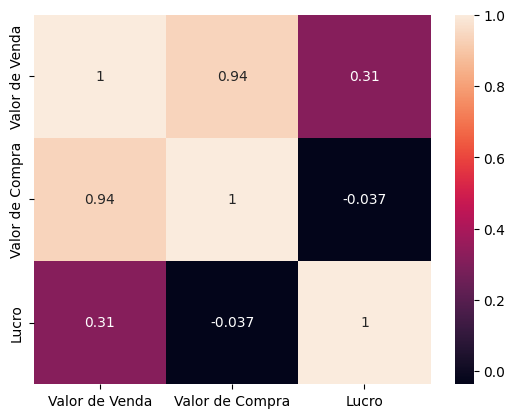

In [28]:
# correlação vem da covariância (expressa um momento entre as variáveis)
# variavel dependente
# Valor de Venda é dependente das outras
# proxima de zero dispensa
# Tenho que transformar os categóricos em numeros para ver as correlações? Sim para isso tem que transformar em variaveis categoricas
# quantidade de correlações altas tem a chance de serem variaveis independentes, de serem atributos chaves e não podem ser retiradas
#

sns.heatmap(df_combustiveis_2.corr(method='pearson', numeric_only=True), annot=True)

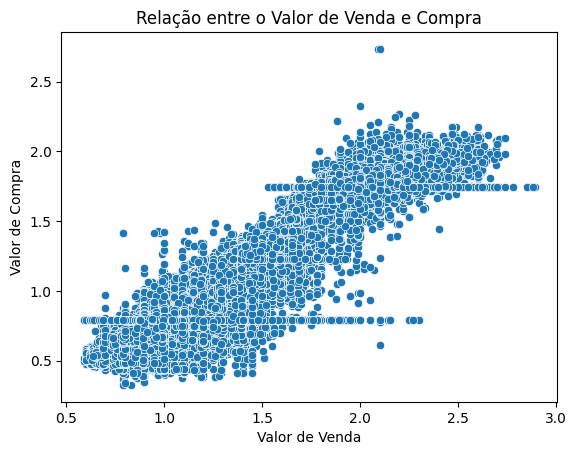

In [29]:
sns.scatterplot(data=df_combustiveis_2, x='Valor de Venda', y='Valor de Compra')
plt.title('Relação entre o Valor de Venda e Compra')
plt.show()

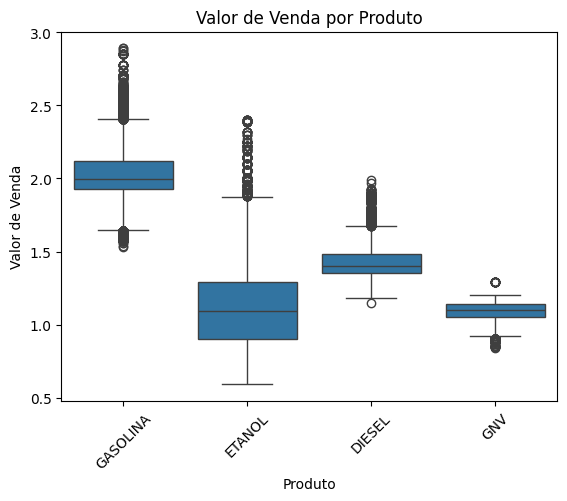

In [30]:
sns.boxplot(data=df_combustiveis_2, x='Produto', y='Valor de Venda')
plt.title('Valor de Venda por Produto')
plt.xticks(rotation=45)
plt.show()

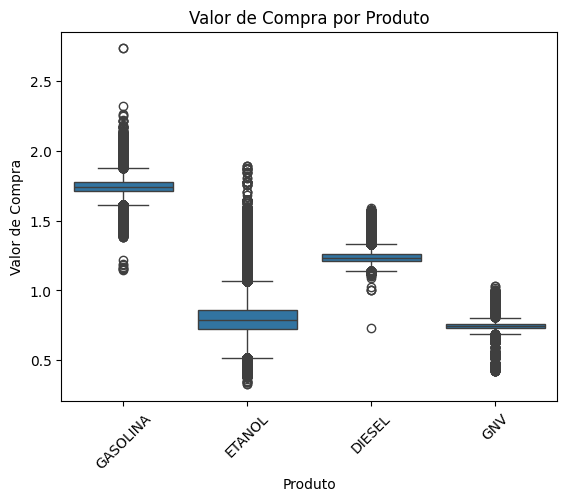

In [31]:
sns.boxplot(data=df_combustiveis_2, x='Produto', y='Valor de Compra')
plt.title('Valor de Compra por Produto')
plt.xticks(rotation=45)
plt.show()

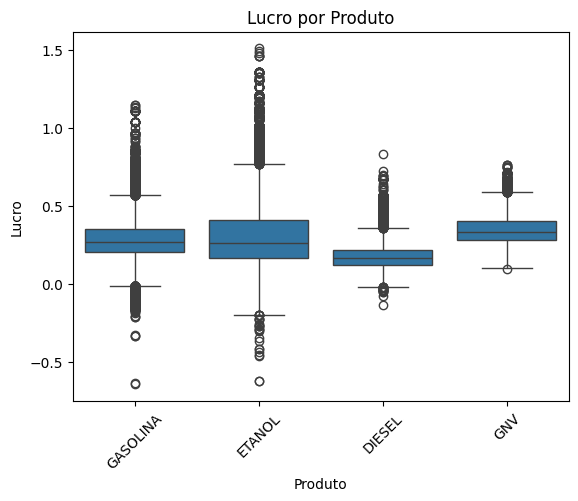

In [32]:
sns.boxplot(data=df_combustiveis_2, x='Produto', y='Lucro')
plt.title('Lucro por Produto')
plt.xticks(rotation=45)
plt.show()

<Axes: >

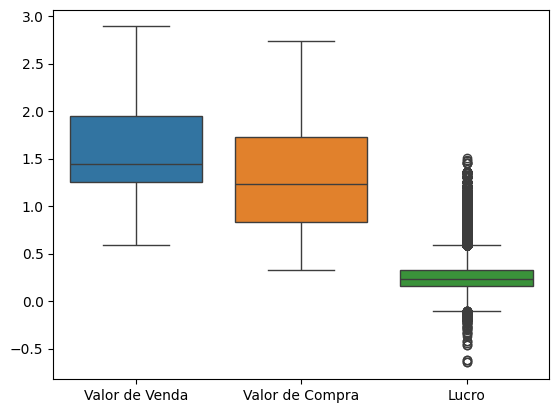

In [33]:
sns.boxplot(data=df_combustiveis_2)

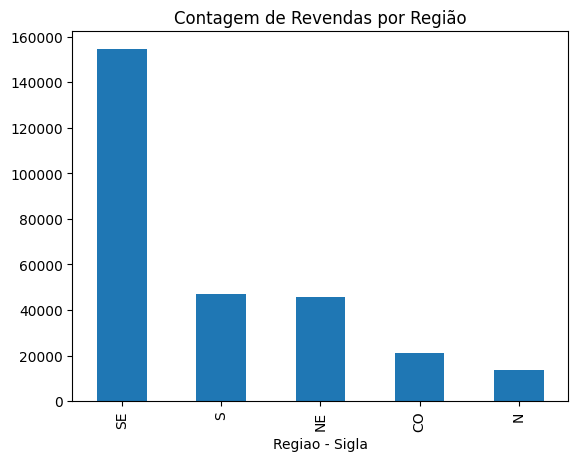

In [34]:
df_combustiveis_2['Regiao - Sigla'].value_counts().plot(kind='bar')
plt.title('Contagem de Revendas por Região')
plt.show()

<Axes: xlabel='Valor de Venda', ylabel='Valor de Compra'>

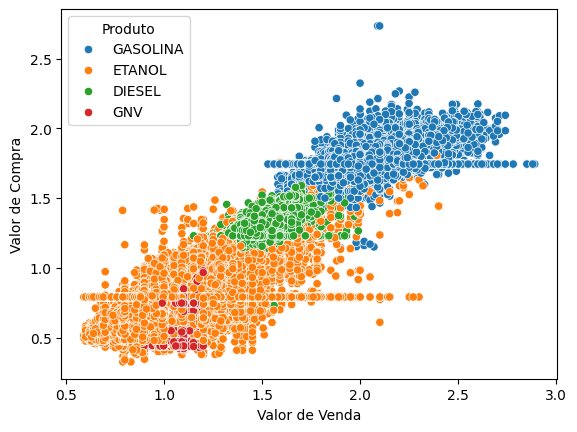

In [35]:
sns.scatterplot(x='Valor de Venda', y='Valor de Compra', data=df_combustiveis_2, hue='Produto')

<Axes: xlabel='Valor de Venda', ylabel='Valor de Compra'>

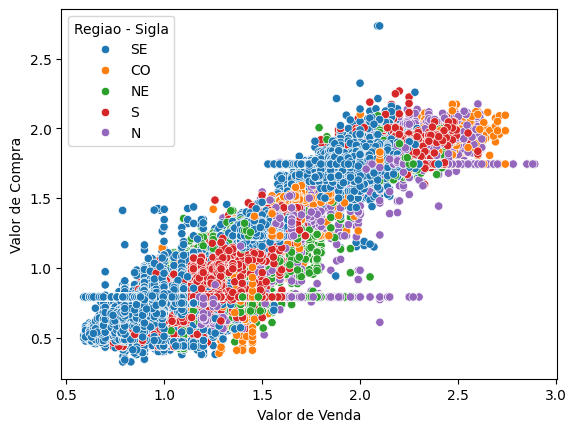

In [36]:
sns.scatterplot(x='Valor de Venda', y='Valor de Compra', data=df_combustiveis_2, hue='Regiao - Sigla')

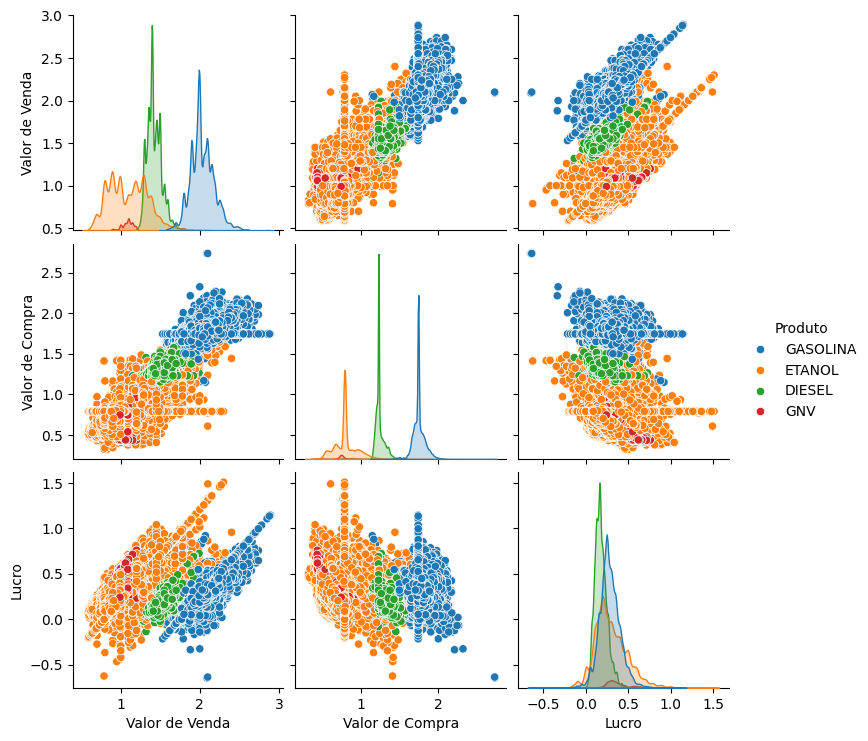

In [37]:
sns.pairplot(df_combustiveis_2, hue='Produto')

<Axes: xlabel='Valor de Compra'>

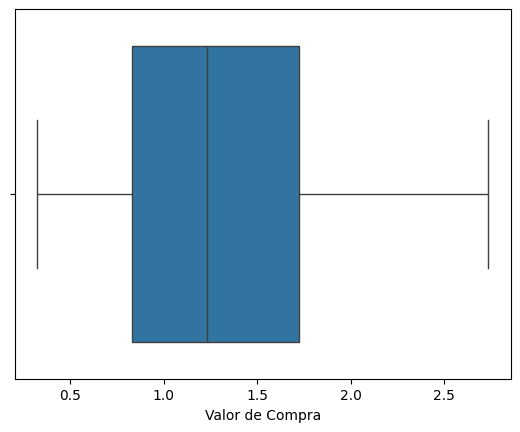

In [38]:
sns.boxplot(x='Valor de Compra', data=df_combustiveis_2)

In [39]:
# identificando casos atípicos
# calculando intervalo interquartil

Q1 = np.percentile(df_combustiveis_2['Valor de Compra'], 25, interpolation='midpoint')
Q3 = np.percentile(df_combustiveis_2['Valor de Compra'], 75, interpolation='midpoint')

In [40]:
Q1

np.float64(0.8328)

In [41]:
Q3

np.float64(1.7251750000000001)

In [42]:
IRQ = Q3 - Q1
IRQ

np.float64(0.8923750000000001)

In [43]:
superior = np.where(df_combustiveis_2['Valor de Compra'] >= (Q3+1.5*IRQ))
inferior = np.where(df_combustiveis_2['Valor de Compra'] <= (Q1-1.5*IRQ))

In [44]:
superior

(array([], dtype=int64),)

In [45]:
inferior

(array([], dtype=int64),)

Análise de Valor de Venda

<Axes: xlabel='Valor de Venda'>

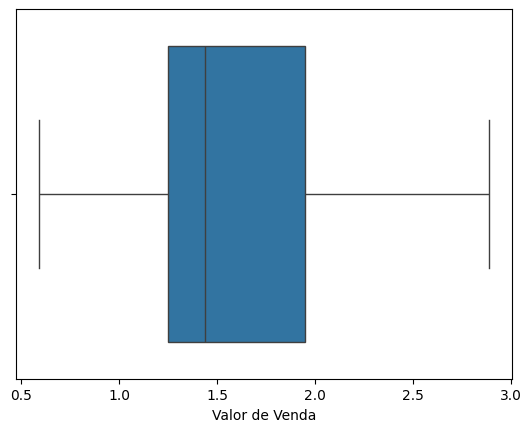

In [46]:
sns.boxplot(x='Valor de Venda', data=df_combustiveis_2)

In [47]:
# identificando casos atípicos
# calculando intervalo interquartil

Q1_v = np.percentile(df_combustiveis_2['Valor de Venda'], 25, interpolation='midpoint')
Q3_v = np.percentile(df_combustiveis_2['Valor de Venda'], 75, interpolation='midpoint')

In [48]:
Q1_v

np.float64(1.25)

In [49]:
Q3_v

np.float64(1.95)

In [50]:
IRQ_v = Q3_v - Q1_v
IRQ_v

np.float64(0.7)

In [51]:
superior_v = np.where(df_combustiveis_2['Valor de Venda'] >= (Q3+1.5*IRQ))
inferior_v = np.where(df_combustiveis_2['Valor de Venda'] <= (Q1-1.5*IRQ))

In [52]:
superior_v

(array([], dtype=int64),)

In [53]:
inferior_v

(array([], dtype=int64),)

In [54]:
df_combustiveis_2.drop(superior_v[0], inplace=True)

<Axes: xlabel='Valor de Venda'>

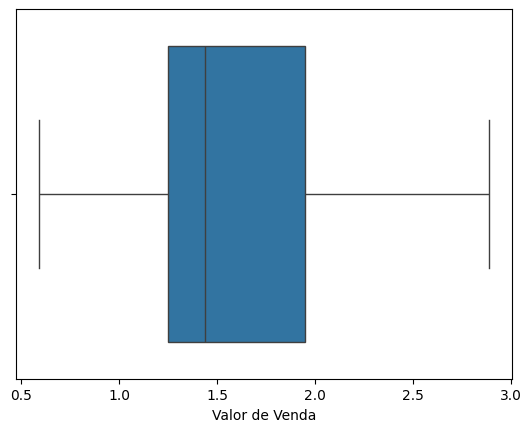

In [55]:
sns.boxplot(x='Valor de Venda', data=df_combustiveis_2)

Análise do Lucro - tirar apenas da base dos dados de origem

<Axes: xlabel='Lucro'>

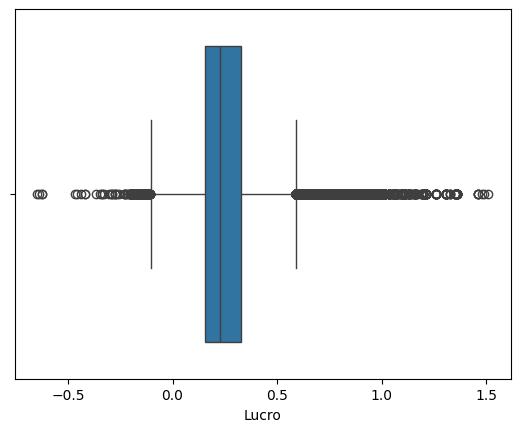

In [56]:
sns.boxplot(x='Lucro', data=df_combustiveis_2)

In [57]:
# identificando casos atípicos
# calculando intervalo interquartil

Q1_L = np.percentile(df_combustiveis_2['Lucro'], 25, interpolation='midpoint')
Q3_L = np.percentile(df_combustiveis_2['Lucro'], 75, interpolation='midpoint')

In [58]:
Q1_L

np.float64(0.15490000000000004)

In [59]:
Q3_L

np.float64(0.3287000000000001)

In [60]:
IRQ_L = Q3_L - Q1_L
IRQ_L

np.float64(0.17380000000000007)

In [61]:
superior_L = np.where(df_combustiveis_2['Lucro'] >= (Q3+1.5*IRQ))
inferior_L = np.where(df_combustiveis_2['Lucro'] <= (Q1-1.5*IRQ))

In [62]:
superior_L

(array([], dtype=int64),)

In [63]:
inferior_L

(array([ 18094,  88410, 232136, 232731]),)

In [64]:
df_combustiveis_2.drop(inferior_L[0], inplace=True)

<Axes: xlabel='Lucro'>

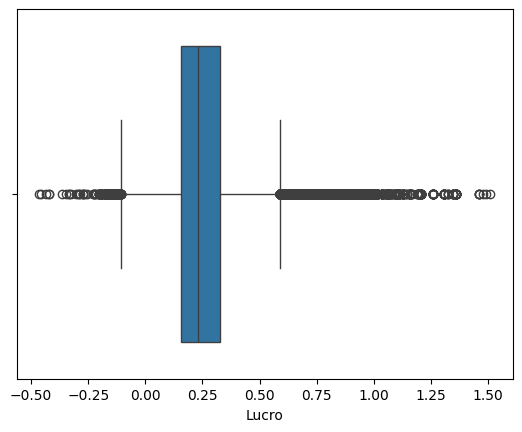

In [65]:
sns.boxplot(x='Lucro', data=df_combustiveis_2)

In [67]:
df_combustiveis_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Valor de Venda,281527.0,1.525637,0.432258,0.5900,1.2500,1.439,1.950000,2.89000
Valor de Compra,281527.0,1.271531,0.410939,0.3257,0.8328,1.230,1.725135,2.32425
Lucro,281527.0,0.254105,0.149958,-0.4653,0.1549,0.229,0.328700,1.50870
